In [1]:
import torch
from torch_geometric.data import Batch
import numpy as np

In [2]:
batch_graph = torch.load('plots/graph_100.pt')

In [3]:
original_graph = Batch.to_data_list(batch_graph.org)[1]

In [4]:
rewired = batch_graph.candidates[0]

In [5]:
rewired._inc_dict['edge_weight'] = rewired._inc_dict['edge_index'].new_zeros(rewired._inc_dict['edge_index'].shape)

In [6]:
rewired._slice_dict['edge_weight'] = rewired._slice_dict['edge_index']

In [7]:
rewired = Batch.to_data_list(rewired)[1]

In [8]:
mask = rewired.edge_weight.nonzero().flatten()

In [9]:
rewired.edge_index = rewired.edge_index[:, mask]

In [10]:
from torch_geometric.utils import to_networkx
import networkx as nx

In [11]:
rewired_nx = to_networkx(rewired, remove_self_loops=True)
org_nx = to_networkx(original_graph, remove_self_loops=True)

In [12]:
layout = dict()

layout[0] = np.array([0., 0.])

layout[1] = np.array([0., 0.2])
layout[16] = np.array([0., -0.2])

layout[2] = np.array([0.21213203435596426, 0.21213203435596423])
layout[9] = np.array([-0.21213203435596423, 0.21213203435596426])
layout[17] = np.array([-0.2121320343559643, -0.21213203435596423])
layout[24] = np.array([0.2121320343559642, -0.2121320343559643])

layout[3] = np.array([0.36955181300451473, 0.15307337294603593])
layout[6] = np.array([0.15307337294603596, 0.36955181300451473])
layout[10] = np.array([-0.1530733729460359, 0.36955181300451473])
layout[13] = np.array([-0.36955181300451473, 0.15307337294603596],)
layout[18] = np.array([-0.3695518130045148, -0.15307337294603587])
layout[21] = np.array([-0.15307337294603615, -0.3695518130045146])
layout[25] = np.array([0.15307337294603568, -0.3695518130045148])
layout[28] = np.array([0.3695518130045146, -0.15307337294603618])


layout[4] = np.array([0.5884711682419382, 0.11705419320967694])
layout[5] = np.array([0.4988817673815271, 0.3333421398117613])
layout[7] = np.array([0.33334213981176136, 0.4988817673815271])
layout[8] = np.array([0.117054193209677, 0.5884711682419382])
layout[11] = np.array([-0.11705419320967692, 0.5884711682419382])
layout[12] = np.array([-0.33334213981176114, 0.49888176738152723])
layout[14] = np.array([-0.498881767381527, 0.3333421398117615])
layout[15] = np.array([-0.5884711682419382, 0.11705419320967717])
layout[19] = np.array([-0.5884711682419383, -0.11705419320967675])
layout[20] = np.array([-0.49888176738152723, -0.33334213981176114])
layout[22] = np.array( [-0.3333421398117613, -0.4988817673815271])
layout[23] = np.array([-0.11705419320967667, -0.5884711682419383])
layout[26] = np.array( [0.1170541932096775, -0.5884711682419381])
layout[27] = np.array([0.33334213981176203, -0.4988817673815267])
layout[29] = np.array([0.49888176738152773, -0.3333421398117604])
layout[30] = np.array( [0.5884711682419385, -0.11705419320967567])

In [13]:
import math

In [14]:
def generate_dots(num_dots, r):
    angle = 2 * math.pi / num_dots / 2.
    dots = []
    for i in range(num_dots):
        dots.append([math.cos(angle) * r, math.sin(angle) * r])
        angle += 2 * math.pi / num_dots
    return dots

In [15]:
# https://matplotlib.org/stable/tutorials/colors/colors.html

In [16]:
node_colors_int = rewired.x[:, 1].detach().cpu().squeeze()
leaf_1 = torch.where(node_colors_int == 1)[0].numpy()
root = np.zeros(1, dtype=np.int64)
intermediate = np.array([1,2,3,6,9,10,13,17,18,21,16,24,25,28])
leaf_0 = np.setdiff1d(np.arange(31), np.union1d(np.union1d(root, intermediate), leaf_1))

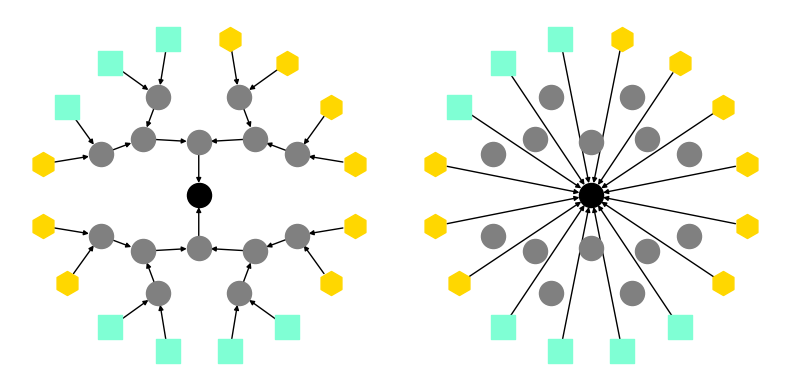

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].axis('off')
axs[0].axis('equal')
nx.draw_networkx_nodes(org_nx, pos=layout, nodelist=root, node_color='black', ax=axs[0])
nx.draw_networkx_edges(org_nx, pos=layout, edgelist=list(org_nx.edges), width=1, edge_color='k', ax=axs[0], arrowsize=7)
nx.draw_networkx_nodes(org_nx, pos=layout, nodelist=leaf_1, node_color='#FFD700', ax=axs[0], node_shape='h')
nx.draw_networkx_nodes(org_nx, pos=layout, nodelist=leaf_0, node_color='#7FFFD4', ax=axs[0], node_shape='s')
nx.draw_networkx_nodes(org_nx, pos=layout, nodelist=intermediate, node_color='grey', ax=axs[0], node_shape='o')

axs[1].axis('off')
axs[1].axis('equal')
nx.draw_networkx_nodes(rewired_nx, pos=layout, nodelist=root, node_color='black', ax=axs[1])
nx.draw_networkx_edges(rewired_nx, pos=layout, edgelist=list(rewired_nx.edges), width=1, edge_color='k', ax=axs[1], arrowsize=7)
nx.draw_networkx_nodes(rewired_nx, pos=layout, nodelist=leaf_1, node_color='#FFD700', ax=axs[1], node_shape='h')
nx.draw_networkx_nodes(rewired_nx, pos=layout, nodelist=leaf_0, node_color='#7FFFD4', ax=axs[1], node_shape='s')
nx.draw_networkx_nodes(rewired_nx, pos=layout, nodelist=intermediate, node_color='grey', ax=axs[1], node_shape='o')
fig.tight_layout()

plt.savefig('leafcount.pdf', dpi=500)